In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny',
           'Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
               'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()

Outlook_encoded=le.fit_transform(Outlook)
Outlook_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))

print("Outlook mapping:",Outlook_name_mapping)

Outlook mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}


In [4]:
Temperature_encoded=le.fit_transform(Temperature)
Temperature_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)


Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}


In [5]:
Humidity_encoded=le.fit_transform(Humidity)
Humidity_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)


Humidity mapping: {'High': 0, 'Normal': 1}


In [6]:
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)


Wind mapping: {'False': 0, 'True': 1}


In [7]:
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

Play mapping: {'No': 0, 'Yes': 1}


In [26]:
data=np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
column_name=['Outlook','Temperature','Humidity','Wind']
data_frm=pd.DataFrame(data=data,columns=column_name)
data_frm


,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [27]:
from sklearn.model_selection import train_test_split

x=data
y=Play
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [28]:
#create a decision tree classifier

from sklearn import metrics

clf=DecisionTreeClassifier()

clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#Accuracy

print("Accurracy:",metrics.accuracy_score(y_test,y_pred))


Accurracy: 0.7142857142857143


In [11]:
from sklearn.metrics import confusion_matrix
print("confusion matrix:\n")
confusion_matrix(y_test,y_pred)


confusion matrix:



array([[2, 0],
       [2, 3]])

In [12]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',
                filled=True,rounded=True,
                special_characters=True,
                feature_names=column_name,
                class_names=['play_no','play_yes'])



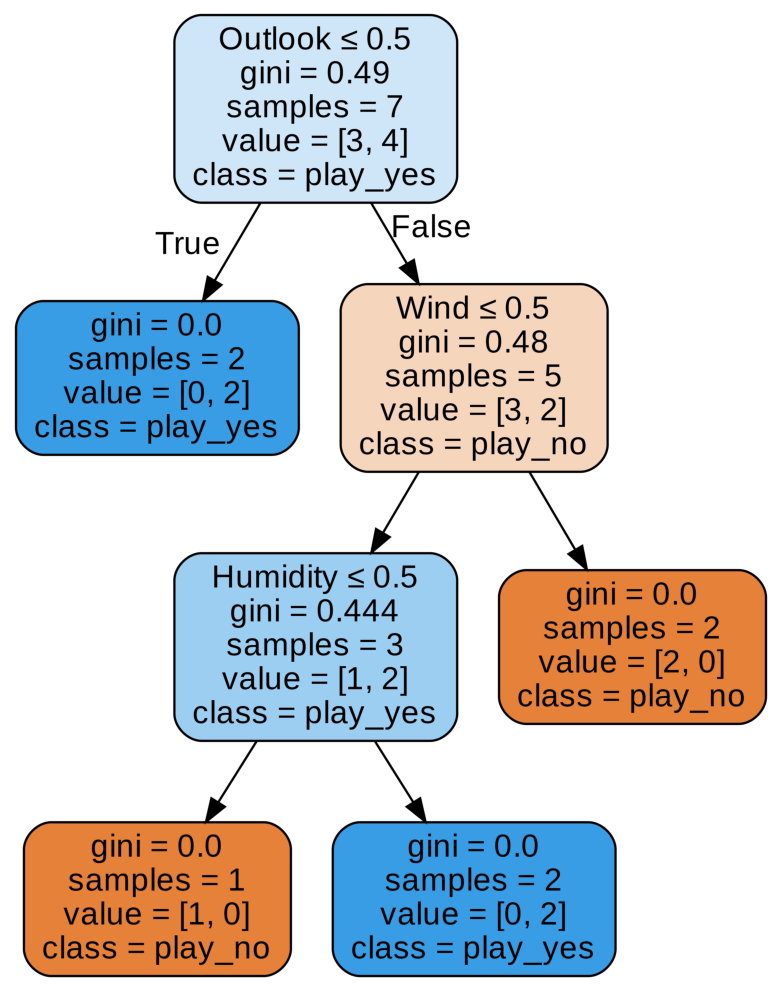

In [13]:
# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [41]:
from sklearn import datasets
#For iris dataset

from sklearn.datasets import load_iris

# df=datasets.load_iris()

iris=load_iris()

data=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Categorical.from_codes(iris.target,iris.target_names)


In [42]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [44]:
y=pd.get_dummies(y)
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, random_state=1)

In [46]:
dt=DecisionTreeClassifier()

dt.fit(X_train,Y_train)

DecisionTreeClassifier()

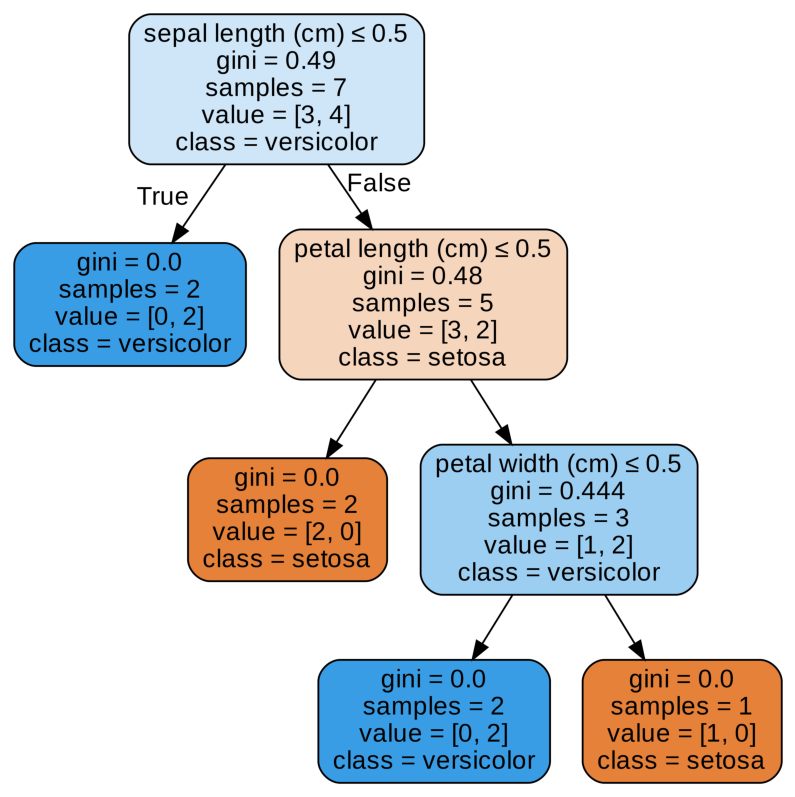

In [51]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy1.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(iris.feature_names),class_names=list(iris.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy1.dot', '-o', 'tree_entropy1.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy1.png'))
plt.axis('off');
plt.show();

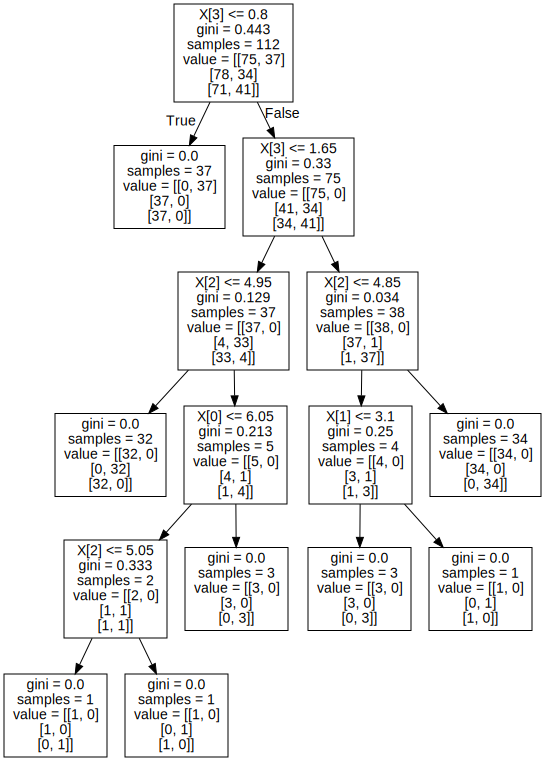

In [52]:
import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(dt)))

In [53]:
y_pred = dt.predict(X_test)
species = np.array(Y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

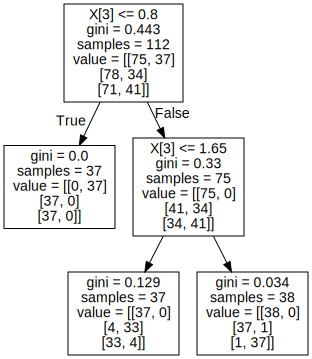

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, random_state=1)
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,Y_train)
import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [59]:
clf=DecisionTreeClassifier(random_state=0)
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas


In [60]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [62]:
clfs = []
for i in ccp_alphas:
  clf=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
  clf.fit(X_train,y_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
  clfs[-1].tree_.node_count, ccp_alphas[-1]))
  

Number of nodes in the last tree is: 31 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 27 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 21 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 19 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 17 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 15 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 13 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 11 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 9 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 7 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 5 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 3 with ccp_alpha: 0.3272984419327777
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


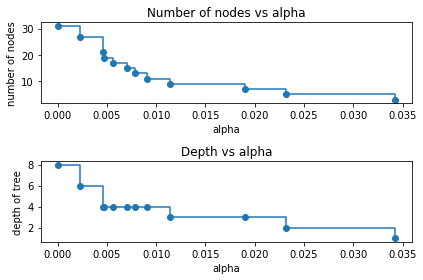

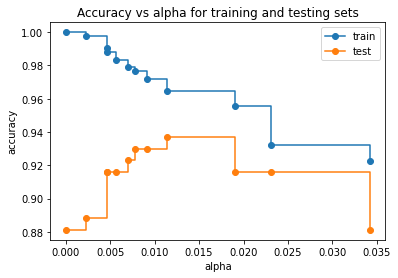

In [63]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [64]:
clf = DecisionTreeClassifier(ccp_alpha=0.0125, criterion='gini')